<a href="https://colab.research.google.com/github/hwarang97/hongong_machine/blob/main/chapter8_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5') # load model

In [3]:
model.layers

In [4]:
conv = model.layers[0] # 모델의 첫번째증(cv2층의 가중치를 알아보기), 숫자는 봐도 알기 어려우니 크기만 확인
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [5]:
conv_weights = conv.weights[0].numpy() # conv는 텐서 클래스이므로, 다루기 쉽게 numpy로 변환
print(conv_weights.mean(), conv_weights.std())

-0.010835777 0.20738049


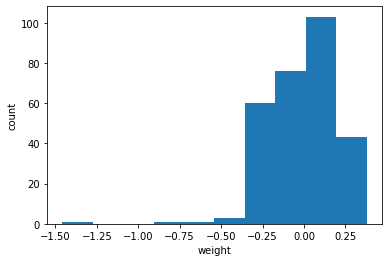

In [6]:
# 가중치의 분포도
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1)) # x축으로 범위를 나누고, y축은 값을 카운트
plt.xlabel('weight')
plt.ylabel('count')
plt.show() # 0 쪽에 모여있음

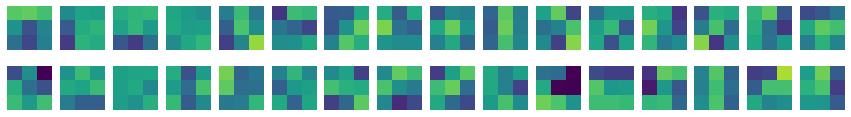

In [7]:
fig, axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5) # [image row, image col, depth, filter]
    axs[i, j].axis('off') # imshow는 배열의 최댓값이면 가장 밝은 노란색으로 표시. 그러나 비교시에는 안좋으므로 절댓값으로 표시하기 위해서 vmin, vmax를 사용
plt.show()

### 학습 안한 모델과 학습한 모델의 분포는 어떤차이가 있는지 확인해보자

In [8]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [9]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [10]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.0048324857 0.081818506


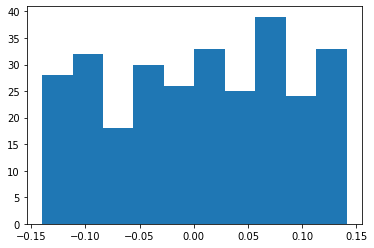

In [11]:
plt.hist(no_training_weights.reshape(-1,1))
plt.show() # 학습시보다 더 넓은, 균등하게 분포되어 있는데 초기값을 균등 분포에서 랜덤하게 값을 선택하기 때문

In [12]:
# 더 복잡한 모델을 만들기 위해서 함수 API를 사용 (입력이 2개이거나 출력이 2개가 되는 경우)

dense1 = keras.layers.Dense(100, activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')

In [14]:
# add가 아닌 함수처럼 호출하기
# hidden = dense1(inputs) # 객체를 함수처럼 사용할 수 있어 -> 그래서 함수형 APi가 아닐까??

In [15]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [20]:
# 만들어둔 모델에서 중간만을 뽑아서 작은 모델을 만들기
conv_acti = keras.Model(model.input, model.layers[0].output) # input layer, con2d output / 그러면 입력 -> cv2 -> 출력 이렇게 만들어진 층인건가

### 특성 맵 시각화하기

4422102/4422102 [==============================] - 0s 0us/step


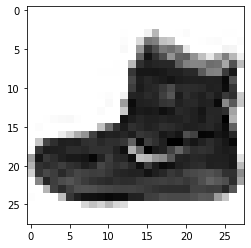

In [21]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [22]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_mapes = conv_acti.predict(inputs)

1/1 [==============================] - 0s 345ms/step


In [23]:
print(feature_mapes) # 숫자로는 파악하기 힘들고 이미지로 그려보자

[[[[0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   ...
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]]

  [[0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   ...
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]]

  [[0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    

In [24]:
print(feature_mapes.shape)

(1, 28, 28, 32)


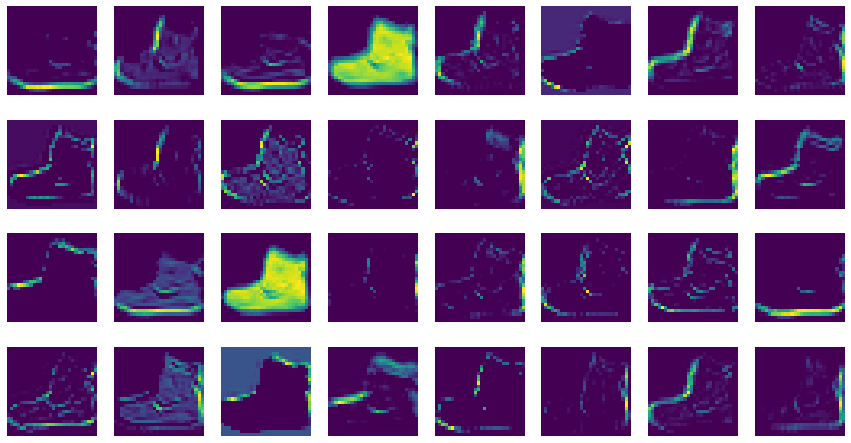

In [25]:
fig, axs = plt.subplots(4,8,figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_mapes[0, :, :, i*8 + j])
    axs[i,j].axis('off')
plt.show()

In [26]:
# 두 번째 합성곱 층이 만든 특성 맵 화깅ㄴ
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [28]:
input = train_input[0:1].reshape(-1, 28,28,1) / 255.0
feature_mapes = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 57ms/step


In [29]:
print(feature_mapes.shape)

(1, 14, 14, 64)


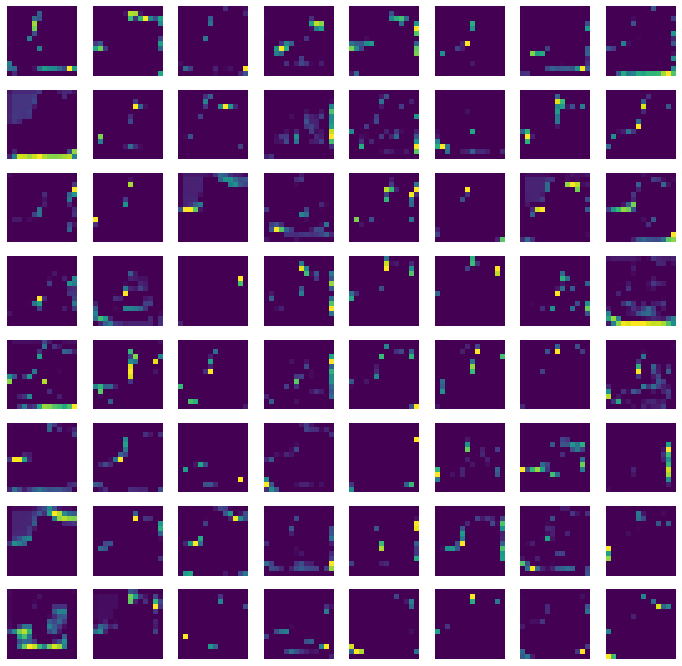

In [31]:
fif, axs = plt.subplots(8,8, figsize=(12,12))# 뒤로 갈수록 더 고차원적인 정보를 얻어냄(앞의 특징들로 더 높은 차원의 측징을 뽑아냄 -- 이해하기 어려움)
for i in range(8):
  for j in range(8):
    axs[i,j].imshow(feature_mapes[0,:,:,8*i+j])
    axs[i,j].axis('off')
plt.show()